In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [5]:
income = pd.read_csv('./dataset/Income1.csv')

In [6]:
income

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


Text(0, 0.5, 'Income')

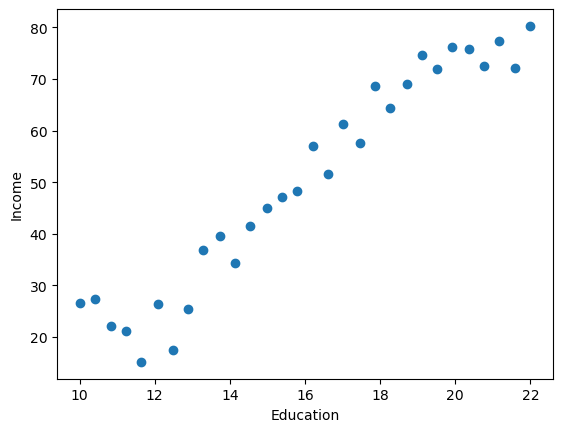

In [7]:
# 관계가 선형인지 확인해 봅시다.
plt.scatter(income.Education, income.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [8]:
# 첫 번째 단계: 예측 함수 y = wx + b 정의b
# 두 번째 단계: 첫 번째 손실 함수 1/2 * (y_true - y_pred)** 2
# 세 번째 단계: 경사 하강법을 사용하여 매개변수 업데이트

In [9]:
# 여기서 w를 0.02로 곱할 수 없습니다. 왜냐하면 PyTorch에서는 비단말 노드(non-leaf node)에서 자동 미분이 되지 않기 때문입니다.
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
w

tensor([0.2213], requires_grad=True)

In [11]:
w.dtype

torch.float32

In [12]:
b.dtype

torch.float32

In [13]:
# ndarray로부터 빠르게 텐서를 생성하려면 torch.from_numpy(ndarray)를 사용하세요.

In [14]:
# 학습 요구 사항은 반드시 2차원이어야 합니다.
X = torch.from_numpy(income.Education.values.reshape(-1, 1)).type(torch.FloatTensor)

In [15]:
Y = torch.from_numpy(income.Income.values).type(torch.FloatTensor)

In [16]:
X.dtype

torch.float32

In [17]:
X.shape

torch.Size([30, 1])

In [18]:
import torch

In [19]:
input_tensor = torch.randn(3,4)  # 예시 입력 텐서
other_tensor = torch.randn(4,5) 

In [20]:
torch.matmul(input_tensor, other_tensor)

tensor([[-1.8770,  1.5466, -2.0160,  1.1754,  1.9697],
        [-3.7081,  3.1529, -1.9446,  2.2334, -0.0972],
        [-1.2161,  1.4610, -1.2296, -0.6149, -0.7763]])

In [21]:
learning_rate = 0.0001

In [22]:
for epoch in range(10000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        
        # 손실함수
        loss = (y - y_pred).pow(2).sum()
        
        # PyTorch에서 같은 변수에 대해 여러 번 미분하면 미분 결과가 누적되므로, 매 반복마다 미분 값을 0으로 초기화해야 합니다.
        if w.grad is not None:
            # w의 미분 값을 재설정합니다.
            w.grad.data.zero_()
            
        if b.grad is not None:
            b.grad.data.zero_()
            
        # 역전파(backward propagation)
        loss.backward()
        
        # w와 b를 업데이트합니다
        # 업데이트할 때에는 미분을 계산할 필요가 없습니다.
        with torch.no_grad():
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate
    if epoch % 100 == 0:
        y_ = torch.matmul(X, w) + b
        l = (Y - y_).pow(2).mean()
        print(w.data, b.data, l.data)

tensor([2.8256]) tensor([0.1599]) tensor(151.3437)
tensor([3.4841]) tensor([-0.8505]) tensor(109.7954)
tensor([3.5394]) tensor([-1.8712]) tensor(105.5590)
tensor([3.5931]) tensor([-2.8636]) tensor(101.5509)
tensor([3.6454]) tensor([-3.8284]) tensor(97.7587)
tensor([3.6962]) tensor([-4.7665]) tensor(94.1706)
tensor([3.7456]) tensor([-5.6785]) tensor(90.7756)
tensor([3.7936]) tensor([-6.5653]) tensor(87.5633)
tensor([3.8403]) tensor([-7.4274]) tensor(84.5238)
tensor([3.8857]) tensor([-8.2656]) tensor(81.6475)
tensor([3.9299]) tensor([-9.0805]) tensor(78.9258)
tensor([3.9728]) tensor([-9.8729]) tensor(76.3501)
tensor([4.0145]) tensor([-10.6432]) tensor(73.9126)
tensor([4.0551]) tensor([-11.3922]) tensor(71.6059)
tensor([4.0945]) tensor([-12.1204]) tensor(69.4227)
tensor([4.1328]) tensor([-12.8284]) tensor(67.3565)
tensor([4.1701]) tensor([-13.5168]) tensor(65.4008)
tensor([4.2064]) tensor([-14.1860]) tensor(63.5500)
tensor([4.2416]) tensor([-14.8367]) tensor(61.7980)
tensor([4.2759]) tens

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# 텐서는 .numpy()를 사용하여 ndarray 형식으로 얻을 수 있습니다.
X.numpy()

array([[10.      ],
       [10.401338],
       [10.84281 ],
       [11.244147],
       [11.645485],
       [12.086957],
       [12.488295],
       [12.889632],
       [13.29097 ],
       [13.732442],
       [14.13378 ],
       [14.535117],
       [14.976588],
       [15.377927],
       [15.779264],
       [16.220736],
       [16.622074],
       [17.02341 ],
       [17.464884],
       [17.86622 ],
       [18.26756 ],
       [18.70903 ],
       [19.110369],
       [19.511705],
       [19.913044],
       [20.354515],
       [20.755854],
       [21.15719 ],
       [21.598661],
       [22.      ]], dtype=float32)

In [25]:
Y.numpy()

array([26.658838, 27.306435, 22.13241 , 21.16984 , 15.192634, 26.39895 ,
       17.435307, 25.507885, 36.884594, 39.666107, 34.396282, 41.497993,
       44.981575, 47.039597, 48.25258 , 57.034252, 51.49092 , 61.33662 ,
       57.58199 , 68.55371 , 64.31093 , 68.95901 , 74.61464 , 71.867195,
       76.09814 , 75.775215, 72.48605 , 77.35502 , 72.11879 , 80.26057 ],
      dtype=float32)

In [44]:
linear = LinearRegression()
linear.fit(X.numpy(), Y.numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
linear.coef_


array([5.599482], dtype=float32)

In [46]:
w.data

tensor([5.1266])

In [47]:
linear.intercept_

-39.44625

In [48]:
b.data

tensor([-32.6958])

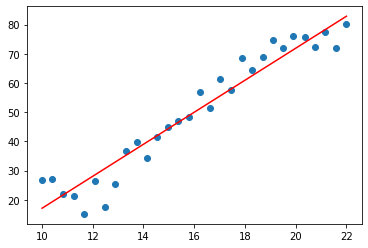

In [55]:
plt.scatter(income.Education, income.Income)
plt.plot(X.numpy(), (torch.matmul(X, w) + b).data.numpy(), c='r')

### 간결한 표현

In [ ]:
# 간결한 표현은 PyTorch의 API를 사용하여 작성하는 것입니다. 

In [56]:
from torch import nn

In [57]:
# PyTorch에서의 완전 연결(FC) 또는 신경망 또는 선형 연산
model = nn.Linear(1, 1)

In [58]:
# mse
loss_fn = nn.MSELoss()

In [59]:
# parameters에 업데이트해야 하는 모델의 매개변수를 배치합니다.
model.parameters()

<generator object Module.parameters at 0x0000019C00E1C948>

In [60]:
# 옵티마이저(optimizer)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [61]:
# 학습(training)
for epoch in range(10000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        # 그라디언트(gradient)를 0으로 초기화
        optimizer.zero_grad()
        loss.backward()
        # 매개변수 업데이트
        optimizer.step()

D:\.venv\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [62]:
model.weight

Parameter containing:
tensor([[5.1309]], requires_grad=True)

In [63]:
model.bias

Parameter containing:
tensor([-32.7909], requires_grad=True)